# Explore here

In [18]:
# Your code heree
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

import os
import joblib

import warnings
warnings.filterwarnings('ignore')

In [ ]:
x_train_data = pd.read_csv('/workspaces/Proyecto-Boosting-Jorge3127/data/processed/dataset_limpio_diabetes_arbol_train.csv')
x_train_data

In [ ]:
x_test_data = pd.read_csv('/workspaces/Proyecto-Boosting-Jorge3127/data/processed/dataset_limpio_diabetes_arbol_test.csv')
x_test_data

In [ ]:
print("----(1). DIVIDO LAS VARIABLES PREDICTORAS DE LA VARIBALE OBJETIVO----")
X_train = x_train_data.drop(["Outcome"], axis = 1)
y_train = x_train_data["Outcome"]

X_test = x_test_data.drop(["Outcome"], axis = 1)
y_test = x_test_data["Outcome"]

In [ ]:
print("----(2). MODELO CON LOS DIFERENTES BOOSTING----\n")

model1_ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model1_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model1_xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state = 42, use_label_encoder=False, eval_metric='mlogloss')
model1_lgb = LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state = 42)

print("----(3). ENTRENOS LOS DIFERENTES MODELOS BOOSTING----\n")

model1_ada.fit(X_train, y_train)
model1_gb.fit(X_train, y_train)
model1_xgb.fit(X_train, y_train)
model1_lgb.fit(X_train, y_train)

In [ ]:
print("----(4). REALIZO PREDICCION EN EL TEST----\n")

ada_y_pred_test = model1_ada.predict(X_test)
gb_y_pred_test = model1_gb.predict(X_test)
xgb_y_pred_test = model1_xgb.predict(X_test)
lgb_y_pred_test = model1_lgb.predict(X_test)

print("----(5). REALIZO PREDICCION EN EL TRAIN----\n")

ada_y_pred_train = model1_ada.predict(X_train)
gb_y_pred_train = model1_gb.predict(X_train)
xgb_y_pred_train = model1_xgb.predict(X_train)
lgb_y_pred_train = model1_lgb.predict(X_train)

In [ ]:
print("----(6). SACO LAS METRICAS TANTO EN TRAIN Y EL TEST PARA LOS MODELOS BOOSTING----\n")

ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_accuracy_train = accuracy_score(y_train, ada_y_pred_train)
ada_accuracy_test = ada_accuracy_test * 100
ada_accuracy_train = ada_accuracy_train * 100

gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)
gb_accuracy_test = gb_accuracy_test * 100
gb_accuracy_train = gb_accuracy_train * 100

xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)
xgb_accuracy_test = xgb_accuracy_test * 100
xgb_accuracy_train = xgb_accuracy_train * 100

lgb_accuracy_test = accuracy_score(y_test, lgb_y_pred_test)
lgb_accuracy_train = accuracy_score(y_train, lgb_y_pred_train)
lgb_accuracy_test = lgb_accuracy_test * 100
lgb_accuracy_train = lgb_accuracy_train * 100

print('Mètricas del AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)
print("\n")
print('Mètricas del Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)
print("\n")
print('Mètricas del XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)
print("\n")
print('Mètricas del LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)

In [25]:
print("---- (7). DEFINO HIPERPARAMETROS A MANO PARA EL ADABOOST-----\n")

model2_ada = AdaBoostClassifier(random_state=42)

print("----(8). DEFINO HIPERPARAMETROS A MANO----\n")

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}


print("----(9). CONFIGURO LA BUSQUEDA DE HIPERPARAMETROS----\n")

grid_search_ada = GridSearchCV(estimator=model2_ada, param_grid=param_grid_ada, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

print("----(10). ENTRENO EL MODELO CON LA BUSQUEDA DE HIPERPARAMETROS----\n")

grid_search_ada.fit(X_train, y_train)

print("----(11). OBTENGO LOS MEJORES HIPERPARAMETROS----\n")

best_params_ada = grid_search_ada.best_params_

print("LOS MEJORES HIPERPARAMETROS DEL ADABOOST SON:", best_params_ada)

print("----(12). UTILIZO EL MEJOR MODELO ENTRENADO----\n")

best_ada = grid_search_ada.best_estimator_

print("----(13). PREDIGO EN EL CONJUNTO DE PRUEBA----\n")

y_pred_test_ada = best_ada.predict(X_test)
y_pred_train_ada = best_ada.predict(X_train)
print("\n")

print("----(14). EVALUO EL MODELO ADABOOST----\n")

accuracy_ada_test = accuracy_score(y_test, y_pred_test_ada)
accuracy_ada_train = accuracy_score(y_train, y_pred_train_ada)
accuracy_ada_test = accuracy_ada_test * 100
accuracy_ada_train = accuracy_ada_train * 100

print("EXACTITUD DE ADABOOST TEST:", accuracy_ada_test)
print("EXACTITUD DE ADABOOST TRAIN:", accuracy_ada_train)


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=200; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=200; total time=   0.5s
[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=200; total time=   0.5s
[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=200; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   0.2s


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=100; total time=   0.2s
[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=200; total time=   0.4s


/home/vscode/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=200; total time=   0.4s


/home/vscode/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=200; total time=   0.3s
[CV] END .algorithm=SAMME, learning_rate=1, n_estimators=200; total time=   0.3s
----(11). OBTENGO LOS MEJORES HIPERPARAMETROS----

LOS MEJORES HIPERPARAMETROS DEL ADABOOST SON: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
----(12). UTILIZO EL MEJOR MODELO ENTRENADO----

----(13). PREDIGO EN EL CONJUNTO DE PRUEBA----



----(14). EVALUO EL MODELO ADABOOST----

EXACTITUD DE ADABOOST TEST: 77.92207792207793
EXACTITUD DE ADABOOST TRAIN: 78.0130293159609


----(15). GRAFICO TEST Y TRAIN DEL ADABOOST INICIAL Y CON LOS HIPERPARAMETROS----



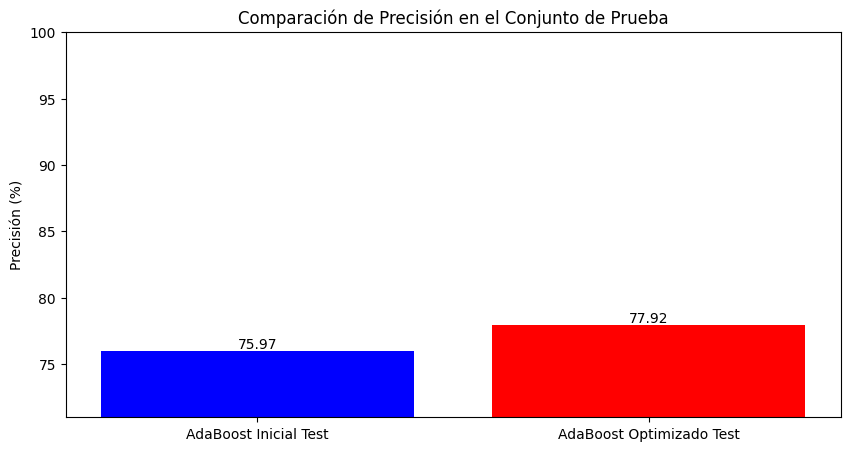

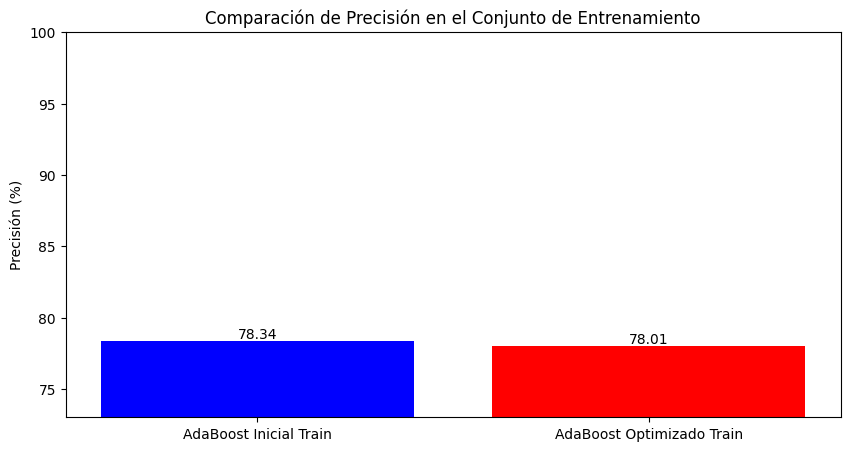

In [26]:
print("----(15). GRAFICO TEST Y TRAIN DEL ADABOOST INICIAL Y CON LOS HIPERPARAMETROS----\n")

# Precisión de AdaBoost Inicial
ada_accuracy_test_initial = ada_accuracy_test
ada_accuracy_train_initial = ada_accuracy_train

# Precisión de AdaBoost Optimizado
ada_accuracy_test_optimized = accuracy_ada_test
ada_accuracy_train_optimized = accuracy_ada_train

# Crear la gráfica de precisión en el conjunto de prueba
plt.figure(figsize=(10, 5))
bars_test = plt.bar(['AdaBoost Inicial Test', 'AdaBoost Optimizado Test'], 
                    [ada_accuracy_test_initial, ada_accuracy_test_optimized], 
                    color=['blue', 'red'])
plt.ylabel('Precisión (%)')
plt.title('Comparación de Precisión en el Conjunto de Prueba')
plt.ylim([min(ada_accuracy_test_initial, ada_accuracy_test_optimized) - 5, 100])

# Añadir etiquetas de precisión sobre las barras
for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# Crear la gráfica de precisión en el conjunto de entrenamiento
plt.figure(figsize=(10, 5))
bars_train = plt.bar(['AdaBoost Inicial Train', 'AdaBoost Optimizado Train'], 
                     [ada_accuracy_train_initial, ada_accuracy_train_optimized], 
                     color=['blue', 'red'])
plt.ylabel('Precisión (%)')
plt.title('Comparación de Precisión en el Conjunto de Entrenamiento')
plt.ylim([min(ada_accuracy_train_initial, ada_accuracy_train_optimized) - 5, 100])

# Añadir etiquetas de precisión sobre las barras
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


COMO PODEMOS DARNOS CUENTA EL MODELO ADABOOST OPTIMIZADO MEJORA LEVEMENTE LAS METRICAS DEL TEST PERO EN GENERAL NOS DA UN MODELO CASI PARECIDO TANTO EN EL TRAIN COMO EN EL TEST LO QUE ES DE BUEN PRONOSTICO.

-----(16). GRAFICO LOS 3 MODELOS CON SUS PRECISIONES
1. ARBOL DE DECISIÒN.
2. RANDOMFOREST.
3. BOOSTING


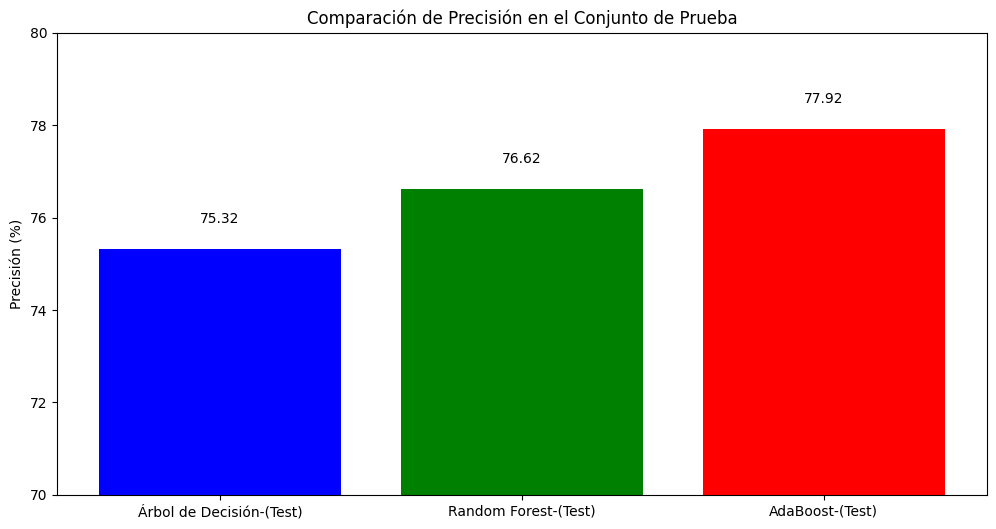

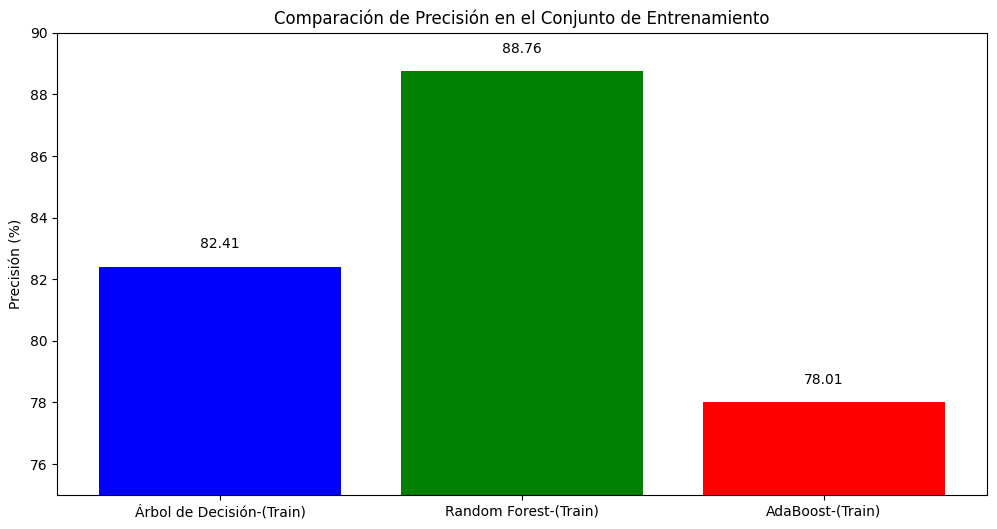

In [27]:
print("-----(16). GRAFICO LOS 3 MODELOS CON SUS PRECISIONES\n1. ARBOL DE DECISIÒN.\n2. RANDOMFOREST.\n3. BOOSTING")

# Datos de precisión
accuracy_test_arbol = 75.32
accuracy_train_arbol = 82.41

accuracy_test_randomforest = 76.62
accuracy_train_randomforest = 88.76

accuracy_test_adaboost = 77.92
accuracy_train_adaboost = 78.01

# Crear la gráfica de precisión en el conjunto de prueba
plt.figure(figsize=(12, 6))
bars_test = plt.bar(['Árbol de Decisión-(Test)', 'Random Forest-(Test)', 'AdaBoost-(Test)'], 
                    [accuracy_test_arbol, accuracy_test_randomforest, accuracy_test_adaboost], 
                    color=['blue', 'green', 'red'])
plt.ylabel('Precisión (%)')
plt.title('Comparación de Precisión en el Conjunto de Prueba')
plt.ylim([70, 80])

# Añadir etiquetas de precisión sobre las barras
for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.show()

# Crear la gráfica de precisión en el conjunto de entrenamiento
plt.figure(figsize=(12, 6))
bars_train = plt.bar(['Árbol de Decisión-(Train)', 'Random Forest-(Train)', 'AdaBoost-(Train)'], 
                     [accuracy_train_arbol, accuracy_train_randomforest, accuracy_train_adaboost], 
                     color=['blue', 'green', 'red'])
plt.ylabel('Precisión (%)')
plt.title('Comparación de Precisión en el Conjunto de Entrenamiento')
plt.ylim([75, 90])

# Añadir etiquetas de precisión sobre las barras
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.show()


EN CONCLUSION: PAR MI EL MEJOR MODELO ES EL DE ADABOOST YA QUE EN TEST EL ADABOOST SE COMPORTA CON MAYOR PRECISION Y ADEMAS, ES SIMILAR ENTRE LAS METRICAS DEL TEST Y TRAIN LO QUE LO HACE UN MODELO QUE A PARECER NO OVERFITEA Y CAUSA SENSACIÒN QUE REALIZA BUENAS PREDICCIONES.

In [28]:
# Definir la ruta donde se guardará el modelo
ruta_modelo = '/workspaces/Proyecto-Boosting-Jorge3127/models/modelo_adaboost_optimizado.pkl'

# Verificar si el directorio existe, si no, crearlo
directorio = os.path.dirname(ruta_modelo)
if not os.path.exists(directorio):
    os.makedirs(directorio)

# Guardar el modelo MultinomialNB
joblib.dump(model2_ada, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /workspaces/Proyecto-Boosting-Jorge3127/models/modelo_adaboost_optimizado.pkl
